**Jupyter: w_ipa**

This is an example jupyter/ipython notebook for WESTPA simulations, designed for interactive analysis using w_ipa.  Use this as a template for further browser-based interactive analysis of simulations.

You'll want to start each notebook session with the following:

```
    import w_ipython
    w = w_ipython.WIPI()
    w.main()
```

The w object can then be used for analysis.  Schemes can be listed and changed with

```
    w.list_schemes
    w.scheme = SCHEME_NUMBER/NAME
```

Run help(w), or w.introduction for more details.

Happy analyzing!

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import w_ipa
w = w_ipa.WIPI()
# At startup, it will load or run the analysis schemes specified in the configuration file (typically west.cfg)
w.main()
w.interface = 'matplotlib'

/home/dhiman/Miniconda2/envs/westpa-2017.10/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Welcome to w_ipa (WESTPA Interactive Python Analysis) v. 1.0B!
Run w.introduction for a more thorough introduction, or w.help to see a list of options.
Running analysis & loading files.

Complete!
Setting iteration to iter 251.


In [2]:
#========================================================
#CALCULATING MILESTONE LIFETIME
#========================================================
total_iteration = 251

it = [0.0 for i in range(total_iteration)]

flux = 0.0
flux_array = []
sink1 = -20.0

it_back = [0.0 for i in range(total_iteration)]
flux_back = 0.0
flux_back_array = []
sink2 = -100.0

lifetime = 0.0
force_eval = 0.0
for i in range(total_iteration):
    w.iteration = i+1
    l = w.current.pcoord
    wts = w.current.weights
    tau = 11
    #print sum(wts)
    force_eval += (tau-1)*w.current.walkers*0.02
    print 'total simulation time = ', force_eval, 'ps'
    for j in range(len(l)):
        #print j
            
        if l[j][0] < sink1 and l[j][tau-1] >= sink1:
            it[i] += wts[j]
            #print wts[j], 'forwd'
            for k in range(tau):
                if l[j][k] < sink1 and l[j][k+1] >= sink1:
                    flux += wts[j]/float(i*tau+k)
                    lifetime += wts[j]*(i*tau+k)
                    break
            #break
                    
        if l[j][0] > sink2 and l[j][tau-1] <= sink2:
            #print l[j,0], l[j,tau-1]
            it_back[i] += wts[j]
            #print wts[j], 'backwd'
            for k in range(tau):
                #print 'elmnts',l[j,k]
                if l[j][k][0] > sink2 and l[j][k+1][0] <= sink2:
                    flux_back += wts[j]/float(i*tau+k)
                    #print flux_back, 'fback'
                    lifetime += wts[j]*(i*tau+k)
                    break
            #break
    flux_array.append(flux)
    flux_back_array.append(flux_back)

print "MFPT = ", 1./flux     
print "MFPT_back = ", 1./flux_back
print "lifetime = ", lifetime/(sum(it)+sum(it_back))
print "forward probability = ", sum(it)
print "backward probability = ", sum(it_back)

f1 = open('milestone-data.dat','w')
print >>f1, "#MFPT  #MFPT_back  #lifetime  #forward probability  #backward probability"
print >>f1, 1./flux, 1./flux_back, lifetime/(sum(it)+sum(it_back)), sum(it), sum(it_back)
f1.close()

Setting iteration to iter 1.
total simulation time =  2.0 ps
Setting iteration to iter 2.
total simulation time =  8.0 ps
Setting iteration to iter 3.
total simulation time =  20.0 ps
Setting iteration to iter 4.
total simulation time =  38.0 ps
Setting iteration to iter 5.
total simulation time =  58.0 ps
Setting iteration to iter 6.
total simulation time =  78.0 ps
Setting iteration to iter 7.
total simulation time =  98.0 ps
Setting iteration to iter 8.
total simulation time =  118.0 ps
Setting iteration to iter 9.
total simulation time =  138.0 ps
Setting iteration to iter 10.
total simulation time =  158.0 ps
Setting iteration to iter 11.
total simulation time =  178.0 ps
Setting iteration to iter 12.
total simulation time =  198.0 ps
Setting iteration to iter 13.
total simulation time =  218.0 ps
Setting iteration to iter 14.
total simulation time =  240.0 ps
Setting iteration to iter 15.
total simulation time =  262.0 ps
Setting iteration to iter 16.
total simulation time =  284

total simulation time =  2946.0 ps
Setting iteration to iter 130.
total simulation time =  2970.0 ps
Setting iteration to iter 131.
total simulation time =  2994.0 ps
Setting iteration to iter 132.
total simulation time =  3016.0 ps
Setting iteration to iter 133.
total simulation time =  3040.0 ps
Setting iteration to iter 134.
total simulation time =  3064.0 ps
Setting iteration to iter 135.
total simulation time =  3088.0 ps
Setting iteration to iter 136.
total simulation time =  3112.0 ps
Setting iteration to iter 137.
total simulation time =  3136.0 ps
Setting iteration to iter 138.
total simulation time =  3160.0 ps
Setting iteration to iter 139.
total simulation time =  3184.0 ps
Setting iteration to iter 140.
total simulation time =  3208.0 ps
Setting iteration to iter 141.
total simulation time =  3232.0 ps
Setting iteration to iter 142.
total simulation time =  3256.0 ps
Setting iteration to iter 143.
total simulation time =  3280.0 ps
Setting iteration to iter 144.
total simu

Setting iteration to iter 122.


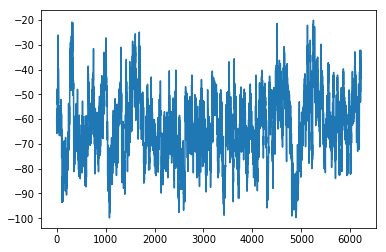

In [7]:
#LOOKING AT A TRAJECTORY
w.iteration = 122
final_trajectories = w.current.seg_id
traj_trace = w.trace(final_trajectories[69])
#print('What data can we access from our trace for segment {}?'.format(final_trajectories[45]))
#print(traj_trace.keys())
# Then plot something interesting about it, like the pcoord or the weight changes over time.
# The resulting plot is per time point, not iteration.
plt.plot(traj_trace['pcoord'])
plt.show()
#plt.plot(np.log10(traj_trace['weights']))
#plt.show()
#trajectory = traj_trace['pcoord']
#print trajectory

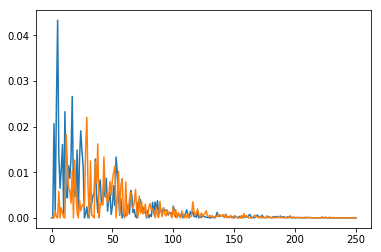

In [3]:
#Forward and backward first passage time distributions
plt.plot(it)
plt.plot(it_back)

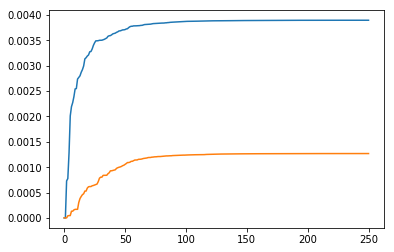

In [4]:
#check for convergence
plt.plot(flux_array)
plt.plot(flux_back_array)

In [5]:
print it
f1 = open('FPTD_forward.dat','w')

for i in range(len(it)):
    print >>f1, i*tau, it[i]
    
f1.close()


f2 = open('FPTD_back.dat','w')

for i in range(len(it)):
    print >>f2, i*tau, it_back[i]
    
f2.close()

[0.0, 0.0, 0.020666666666666667, 0.0016, 0.024833333333333332, 0.0433, 0.01354, 0.006483333333333333, 0.010882222222222224, 0.016072222222222224, 0.0008333333333333333, 0.023258377425044094, 0.004566137566137567, 0.004415343915343916, 0.011391460905349794, 0.008680555555555556, 0.013323698216735255, 0.026615740740740742, 0.004501530864197531, 0.0071324895941521325, 0.004707774796075838, 0.014881471452658567, 0.0012799339085085336, 0.013068624399349589, 0.01906938893631664, 0.014550740113658632, 0.011276403062822524, 0.0, 0.0009337725837742503, 0.0024323981943446486, 0.0, 0.0005399559487360376, 0.0032042496129752636, 0.0031216623019212513, 0.004882238525377229, 0.005402515575697436, 0.012914273248754824, 0.004846595138834316, 0.0011723250232796975, 0.00680408647958547, 0.008319412698143685, 0.003202600425400837, 0.003223487238383182, 0.007635967480306923, 0.004593280715214015, 0.008683876797202363, 0.0014716619457692717, 0.00399254883336385, 0.005602106613830786, 0.0007558242027651374, 